<a href="https://colab.research.google.com/github/singhhshipra/ML_LAB_/blob/main/1BM22CS341_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris dataset
iris_df = pd.read_csv("/iris.csv")
X_iris = iris_df.iloc[:, :-1]  # Features
y_iris = iris_df.iloc[:, -1]   # Target

# Split Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train KNN model for Iris
k_iris = 5  # Optimal k value can be tuned further
knn_iris = KNeighborsClassifier(n_neighbors=k_iris)
knn_iris.fit(X_train_iris, y_train_iris)

# Predictions for Iris
y_pred_iris = knn_iris.predict(X_test_iris)

# Evaluation for Iris
print("Iris Dataset Results:")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

# Load Diabetes dataset
diabetes_df = pd.read_csv("/diabetes (1).csv")
X_diabetes = diabetes_df.iloc[:, :-1]  # Features
y_diabetes = diabetes_df.iloc[:, -1]   # Target

# Feature Scaling for Diabetes dataset
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# Split Diabetes dataset
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)

# Train KNN model for Diabetes
k_diabetes = 7  # Optimal k value can be tuned further
knn_diabetes = KNeighborsClassifier(n_neighbors=k_diabetes)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Predictions for Diabetes
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

# Evaluation for Diabetes
print("\nDiabetes Dataset Results:")
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))

Iris Dataset Results:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Diabetes Dataset Results:
Accuracy: 0.6818181818181818
Confusion Matrix:
 [[78 21]
 [28 27]]


Best k: 12, Best Accuracy: 0.8688524590163934


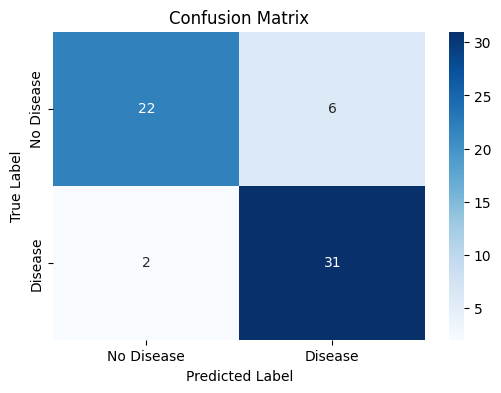

              precision    recall  f1-score   support

  No Disease       0.92      0.79      0.85        28
     Disease       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/heart.csv")

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Find the best k
best_k = 1
best_score = 0
scores = {}

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[k] = acc
    if acc > best_score:
        best_score = acc
        best_k = k

print(f"Best k: {best_k}, Best Accuracy: {best_score}")

# Train KNN with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred_best, target_names=["No Disease", "Disease"])
print(report)
